In [1]:
from tensorflow.keras.datasets import mnist
(X,Y),(X_test,Y_test)=mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [2]:
from matplotlib import pyplot as plt
import numpy as np
import cv2
import pandas as pd

In [3]:
import torch

In [4]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [5]:
X.shape

(60000, 28, 28)

In [6]:
X = X.reshape((60000, 28*28)) #Flattaning

In [7]:
avg=X-X.mean(axis=0)
print(avg.shape)

(60000, 784)


In [8]:
cov_ims = np.cov(avg.T)
print(cov_ims.shape)

(784, 784)


In [9]:
u, v = np.linalg.eigh(cov_ims)
print(u.shape, v.shape)

(784,) (784, 784)


In [10]:
print(u[0], u[-1]) #range of eigen values

-6.762508007005859e-11 332724.6674465682


In [11]:
vt=torch.from_numpy(v)
xt=torch.from_numpy(X)
Txt=torch.from_numpy(X_test)

In [12]:
if torch.cuda.is_available():
    device1 = torch.device("cuda")

In [13]:
z=X.mean(axis=0)
zt=torch.from_numpy(z)

In [14]:
xt =xt.to(device1)
zt =zt.to(device1)
vt =vt.to(device1)
Txt=Txt.to(device1)
xt = xt.double()
zt = zt.double()
vt =vt.double()

In [15]:
import tqdm
from tqdm import tqdm_notebook

In [16]:
device2 = torch.device("cpu")

In [17]:
def knn1(X_test,X_train,Y_train,k):
  X = X_train.reshape((60000, 28*28))
  Xt=X_test.reshape((len(X_test), 28*28))
  model = KNeighborsClassifier(n_neighbors=k)
  model.fit(X,Y_train)
  p=[]
  
  q=model.predict(Xt)

  return q

In [18]:
def accuracy(p,Y_test):
  count=0
  for i in range(len(p)):
          if(p[i]==Y_test[i]):
            count=count+1

  error_rate=(count/len(p))*100
  return (error_rate)

In [19]:
k_values=[3,5,7,9]

In [20]:
X_rc=[]
for i in tqdm.notebook.tqdm  (range(len(xt))):
  #No. of comp
  c=xt.mean(axis=0)+vt[:,774:784] @ vt[:,774:784].T @ xt[i]
  X_rc.append(c.to("cpu"))

In [21]:
X_rc_img=[]
for i in X_rc:
  X_rc_img.append(i.numpy())
X_rc_img = np.array(X_rc_img)
Xrc=X_rc_img.reshape((60000, 28, 28))

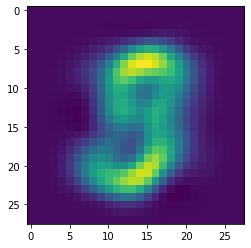

In [22]:
plt.imshow(Xrc[0])
plt.show()

In [25]:
for i in k_values:  
  p=knn1(X_test[:1000],Xrc,Y,i)
  acc=accuracy(p,Y_test)
  print(i,acc)

3 61.5
5 61.7
7 61.5
9 60.5


In [27]:
X_rc1=[]
for i in tqdm.notebook.tqdm  (range(len(xt))):
  c=xt.mean(axis=0)+vt[:,684:784] @ vt[:,684:784].T @ xt[i]
  X_rc1.append(c.to("cpu"))

In [28]:
X_rc_img1=[]
for i in X_rc1:
  X_rc_img1.append(i.numpy())
X_rc_img1 = np.array(X_rc_img1)
Xrc1=X_rc_img1.reshape((60000, 28, 28))

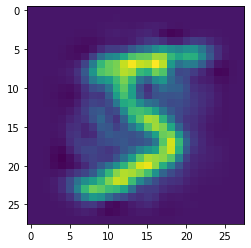

In [29]:
plt.imshow(Xrc1[0])
plt.show()

In [ ]:
for i in k_values:  
  p=knn1(X_test[:5000],Xrc1,Y,i)
  acc=accuracy(p,Y_test)
  print(i,acc)

In [ ]:
X_rc2=[]
for i in tqdm.notebook.tqdm  (range(len(xt))):
  c=xt.mean(axis=0)+vt[:,734:784] @ vt[:,734:784].T @ xt[i]
  X_rc2.append(c.to("cpu"))

In [ ]:
X_rc_img2=[]
for i in X_rc2:
  X_rc_img2.append(i.numpy())
X_rc_img2 = np.array(X_rc_img2)
Xrc2=X_rc_img2.reshape((60000, 28, 28))

In [ ]:
plt.imshow(Xrc2[0])
plt.show()

In [ ]:
for i in k_values:
  p=knn(X_test[:100],Xrc2,Y,i)
  acc=accuracy(p,Y_test)
  print(i,acc)

In [ ]:
for i in k_values:  
  p=knn1(X_test[:1000],Xrc2,Y,i)
  acc=accuracy(p,Y_test)
  print(i,acc)

In [ ]:
X_rc3=[]
for i in tqdm.notebook.tqdm  (range(len(xt))):
  c=xt.mean(axis=0)+vt[:,684:784] @ vt[:,684:784].T @ xt[i]
  X_rc3.append(c.to("cpu"))

In [ ]:
X_rc_img3=[]
for i in X_rc3:
  X_rc_img3.append(i.numpy())
X_rc_img3 = np.array(X_rc_img3)
Xrc3=X_rc_img3.reshape((60000, 28, 28))

In [ ]:
plt.imshow(Xrc3[0])
plt.show()

In [ ]:
for i in k_values:  
  p=knn1(X_test[:1000],Xrc3,Y,i)
  acc=accuracy(p,Y_test)
  print(i,acc)